# Clustering, KNN, Markov and MC

##  Index
* [Imports](#Imports)
* [Clustering](#Clustering)
* [KNN](#KNN)
* [Markov](#Markov)
* [Monte Carlo Simulation](#Monte-Carlo-Simulation)

## Imports

In [1]:
# Full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Common libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn.metrics.pairwise import manhattan_distances,euclidean_distances
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from IPython.display import clear_output
import time

# Personal libraries
import aux_plot as ap


[Back to index](#Index)

## Clustering

* [Distance Measures](#Distance-Measures)
* [K-means](#K-means)
* [PCA](#PCA)
* [Spectral Clusterng [Bonus]](#Spectral-Clusterng-[Bonus])
* [Hierarchical Clustering and Portfolio Management [Bonus]](#Hierarchical-Clustering-and-Portfolio-Management-[Bonus])

### Distance Measures

* [Euclidean](#Euclidean)
* [Manhattan](#Manhattan)
* [Minkowski](#Minkowski)
* [Mahalanobis](#Mahalanobis)
* [Correlation](#Correlation)

#### Euclidean

_The euclidian distance between points $a$ and $b$ is the length of the line segment connecting them._
$$\sqrt{\sum^n_{j=1}(x_{ij}-x_{kj})^2}$$


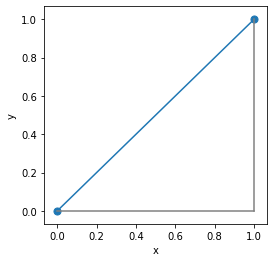

In [2]:
# Two trivial points in two dimensions
dt = pd.DataFrame({"a" : (0, 0),
                   "b" : (1, 1)},index=["x","y"]).T

# Plot Euclidean distance between the two points
dt.plot(kind="scatter",x="x",y="y", s=50,figsize=[4,4])
a = dt.loc["a"].tolist()
b = dt.loc["b"].tolist()
ap.plot_euclidean_connection(a,b)

Computing distance manually

In [3]:
# squared distance of dimension x + squared distance of dimension y
ssd = (dt.loc["a","x"]-dt.loc["b","x"])**2 +(dt.loc["a","y"]-dt.loc["b","y"])**2
np.sqrt(ssd) 

1.4142135623730951

Computing distance with sklearn

In [4]:
#values needs be in 2-D array
euclidean_distances([dt.loc["a"]],[dt.loc["b"]])[0][0] 

1.4142135623730951

Computing distance between multiple points

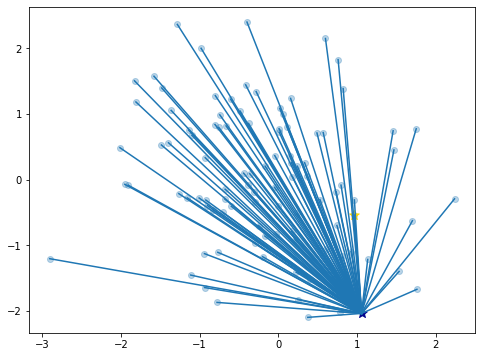

In [28]:
# Generate two random vectors
x = np.random.normal(size=100,)
y = np.random.normal(size=100)
plt.figure(figsize=[8,6])
plt.scatter(x,y,alpha=0.3)

# Select two points at random
#np.random.seed(5)
sel_a,sel_b = np.random.choice(range(y.shape[0]),size=2)

# Highlight selected points 
plt.scatter(x[sel_a], y[sel_a], c="darkblue",marker="*",s=100)
plt.scatter(x[sel_b], y[sel_b], c="gold",marker="*"    ,s=100)

# Draw distance line/s
ap.plot_euclidean_distance(x,y,sel_a,sel_b)
ap.plot_euclidean_distances(sel_a,x,y)

In [6]:
data = pd.DataFrame(list(zip(x,y)),columns = ["x","y"])
eudistance =  euclidean_distances([data.x], [data.y])
print(eudistance)

[[15.9989316]]


[Back to Distance Measures](#Distance-Measures)

#### Manhattan

The Manhattan distance is the distance between the projection of the points on the axis.

$$\sum^n_{j=1}|x_{ij} - x_{kj}|$$

<img src="images/200px-Manhattan_distance.svg.png" align="center" style="float" width="200">

In [7]:
manhattan_distances([dt.loc["a"]],[dt.loc["b"]])[0][0] 

2.0

In [8]:
from importlib import reload
ap = reload(ap)

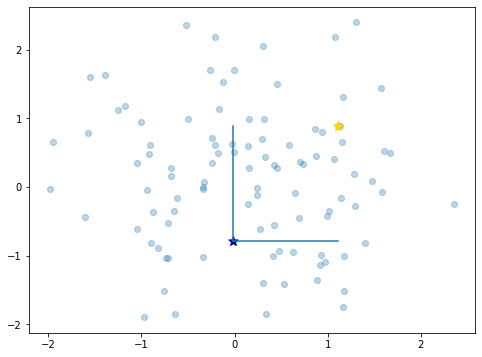

In [9]:
# Plot scatter
plt.figure(figsize=[8,6])
plt.scatter(x,y,alpha=0.3)

# Highlight selected points 
plt.scatter(x[sel_a], y[sel_a], c="darkblue",marker="*",s=100)
plt.scatter(x[sel_b], y[sel_b], c="gold",marker="*"    ,s=100)

# Draw distance line/s
ap.plot_manhattan_distance(x,y,sel_a,sel_b)

<font color="blue"><b> Which one would you expect it to be higher?

In [10]:
#mhdistance =  manhattan_distances([data.x], [data.y])
#print(mhdistance)

[Back to Distance Measures](#Distance-Measures)

#### Minkowski 

Is a generalization of Manhattan and Euclidean distances 

$$\sqrt[m]{\sum^n_{j=1}(|x_{ij}-x_{kj}|)^m}$$

In [11]:
pairwise_distances([dt.loc["a"]],[dt.loc["b"]],metric="minkowski", p=4) 

array([[1.18920712]])

In [12]:
print("Manhattan:",pairwise_distances([data.x],[data.y],
                                      metric="manhattan")[0][0])
print("Euclidean:",pairwise_distances([data.x],[data.y],
                                      metric="euclidean")[0][0])
print("Minkowski(p=1):",pairwise_distances([data.x],[data.y],
                                           metric="minkowski",p=1)[0][0])
print("Minkowski(p=2):",pairwise_distances([data.x],[data.y],
                                           metric="minkowski",p=2)[0][0])
print("Minkowski(p=3):",pairwise_distances([data.x],[data.y],
                                           metric="minkowski",p=3)[0][0])
print("Minkowski(p=4):",pairwise_distances([data.x],[data.y],
                                           metric="minkowski",p=4)[0][0])

Manhattan: 112.7137905551001
Euclidean: 13.903628651411214
Minkowski(p=1): 112.7137905551001
Minkowski(p=2): 13.903628651411212
Minkowski(p=3): 7.3644188647446445
Minkowski(p=4): 5.502016010990313


[Back to Distance Measures](#Distance-Measures)

#### Mahalanobis

The Mahalanobis distance is a measure of the distance between a point $P$ and a distribution $D$.It is a multi-dimensional generalization of the idea of measuring how many standard deviations away $P$ is from the mean of $D$.This distance is zero if P is at the mean of D, and grows as P moves away from the mean along each principal component axis.

$$\sqrt{(x_i-x_k)^T S^{-1}(x_i-x_k)}$$
where $S$ is the 

In [13]:
print("Manhattan:",pairwise_distances([data.x],[data.y],
                                      metric="manhattan")[0][0])

Manhattan: 112.7137905551001


In [14]:
euclidean_distances([dt.loc["a"]],[dt.loc["b"]])[0][0] 

1.4142135623730951

In [15]:
print("Mahalanobis:",pairwise_distances(data.values,metric="mahalanobis")[0][0])

Mahalanobis: 0.0


<font color="red"><b>PENDING: Review if we are selecting the vectors correctly

[Back to Distance Measures](#Distance-Measures)

#### Correlation

<font color="red"><b>PENDING

[Back to Distance Measures](#Distance-Measures)

[Back to Clustering](#Clustering)

### K-means

* [Algorithm](#Algorithm)
* [Assumptions](#Assumptions)
* [Stlyzed vs. Real Life](#Stlyzed-vs.-Real-Life)
* [Evaluation Methods](#Evaluation-Methods)

#### Algorithm

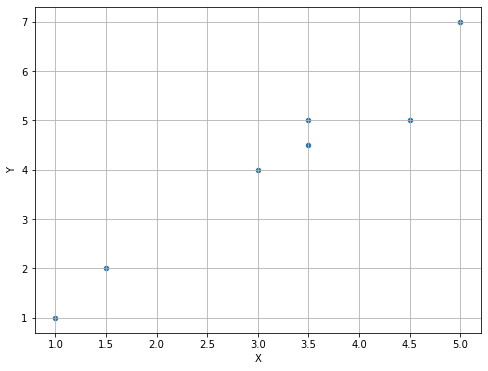

In [29]:
clus_dt = pd.DataFrame({"Subject": [1,2,3,4,5,6,7],
                        "X"      : [1,1.5,3,5,3.5,4.5,3.5],
                        "Y"      : [1,2,4,7,5,5,4.5]}).set_index("Subject")
clus_dt.plot(kind="scatter",x="X",y="Y",grid=True, figsize=[8,6])

**K-means algorithm**  
* Step 1: Partition the n objects into K initial clusters
* Step 2: Compute the centroid(mean) of each cluster
* Step 3: Re-allocate each point to the cluster with the closest centroid 

            X    Y
Cluster           
0        3.90  5.1
1        1.25  1.5


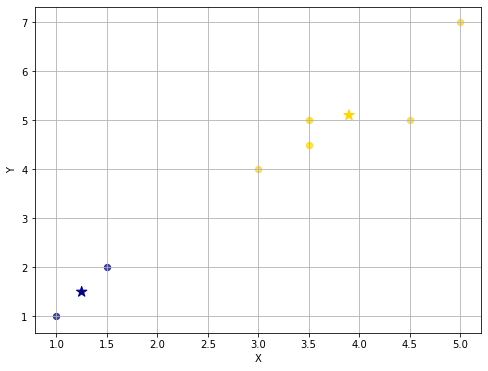

In [30]:
step1,step2,step3, = True,True,True,
explore_dist = True
explore_dist_all = True
final_r = True

sel_sub = 4 # subject selection
sel_cen = 2 # centroid selection


# Step:1 Partition the n objects into K initial clusters
if step1:
    # Assing subjects to clusters
    clus_dt["Cluster"] = [1,1,1,1,2,2,2]
    
    # Plot group 1
    g1_mask = (clus_dt["Cluster"] == 1)
    ax = clus_dt.loc[g1_mask,["X","Y"]].plot(kind="scatter",x="X",y="Y", 
                                              color="gold",grid=True,s=40,alpha=0.7,
                                              figsize=[8,6])
    # Plot group 2
    g2_mask = (clus_dt["Cluster"] == 2)
    clus_dt.loc[g2_mask,["X","Y"]].plot(kind="scatter",x="X",y="Y",ax=ax,
                                         color="darkblue",grid=True,s=40,alpha=0.7,
                                         figsize=[8,6])

# Step 2: Compute the centroid(mean) of each cluster
if step1 and step2:
    centroids = clus_dt.groupby("Cluster").mean()
    print(centroids)
    # Plot centroids
    centroids.plot(kind="scatter",x="X",y="Y",ax=ax,
                   color=["gold","darkblue"],grid=True,s=120, marker="*")
    
#Step 3: Re-allocate each point to the cluster with the closest centroid 
if step1 and step2 and step3:
    clus_dt["Cluster"] = [1,1,1,2,2,2,2]
    # Plot group 1
    g1_mask = (clus_dt["Cluster"] == 1)
    ax = clus_dt.loc[g1_mask,["X","Y"]].plot(kind="scatter",x="X",y="Y", 
                                              color="gold",grid=True,s=40,alpha=0.7,
                                              figsize=[8,6])
    # Plot group 2
    g2_mask = (clus_dt["Cluster"] == 2)
    clus_dt.loc[g2_mask,["X","Y"]].plot(kind="scatter",x="X",y="Y",ax=ax,
                                         color="darkblue",grid=True,s=40,alpha=0.7,
                                         figsize=[8,6])
if explore_dist:    
    plot_x = pd.concat([clus_dt.X,centroids.X]).reset_index(drop="True")
    plot_y = pd.concat([clus_dt.Y,centroids.Y]).reset_index(drop="True")
    ap.plot_euclidean_distance(plot_x,plot_y,
                               sel_sub-1,clus_dt.shape[0] + sel_cen-1)
if explore_dist_all:
    for point in clus_dt.index:
        for clus in  clus_dt.Cluster.unique():
            ax = clus_dt.loc[g1_mask,["X","Y"]].plot(kind="scatter",x="X",y="Y", 
                                                  color="gold",grid=True,s=40,alpha=0.7,
                                                  figsize=[8,6])
            clus_dt.loc[g2_mask,["X","Y"]].plot(kind="scatter",x="X",y="Y",ax=ax,
                                                color="darkblue",grid=True,s=40,alpha=0.7,
                                                figsize=[8,6])
            centroids.plot(kind="scatter",x="X",y="Y",ax=ax,
                           color=["gold","darkblue"],grid=True,s=120, marker="*")
            plot_x = pd.concat([clus_dt.X,centroids.X]).reset_index(drop="True")
            plot_y = pd.concat([clus_dt.Y,centroids.Y]).reset_index(drop="True")
            ap.plot_euclidean_distance(plot_x,plot_y,
                                       point-1,clus_dt.shape[0] + clus-1)
            plt.show()
            time.sleep(1)
            clear_output()

if final_r:
    # Compute full algorithm with Sckit-learn
    rs=1
    X = clus_dt[["X","Y"]].values
    y_pred = KMeans(n_clusters=2, random_state=rs).fit_predict(X)
    clus_dt["Cluster"] = y_pred
    
    g1_mask = (clus_dt["Cluster"] == 0)
    ax = clus_dt.loc[g1_mask,["X","Y"]].plot(kind="scatter",x="X",y="Y", 
                                              color="gold",grid=True,s=40,alpha=0.7,
                                              figsize=[8,6])
    # Plot group 2
    g2_mask = (clus_dt["Cluster"] == 1)
    clus_dt.loc[g2_mask,["X","Y"]].plot(kind="scatter",x="X",y="Y",ax=ax,
                                         color="darkblue",grid=True,s=40,alpha=0.7,
                                         figsize=[8,6])
    centroids = clus_dt.groupby("Cluster").mean()
    print(centroids)
    # Plot centroids
    centroids.plot(kind="scatter",x="X",y="Y",ax=ax,
                   color=["gold","darkblue"],grid=True,s=120, marker="*")

[Back to K-means](#K-means)

#### Assumptions

* The number of clusters is known in advanced
* The variance of the distribution of each attribute (variable) is spherical
* All variables have the same variance
* The prior probability for all k clusters are the same, i.e. each cluster has roughly equal number of observations

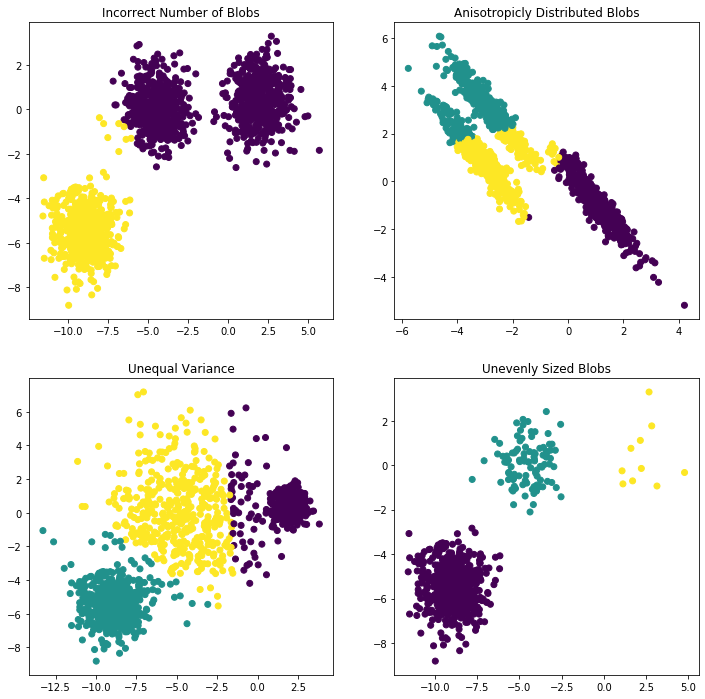

In [23]:
ap.plot_breaking_kmeans_assumptions(n_samples=1500,random_state=170)

[Back to K-means](#K-means)

#### Stlyzed vs. Real Life

##### Stlyzed case

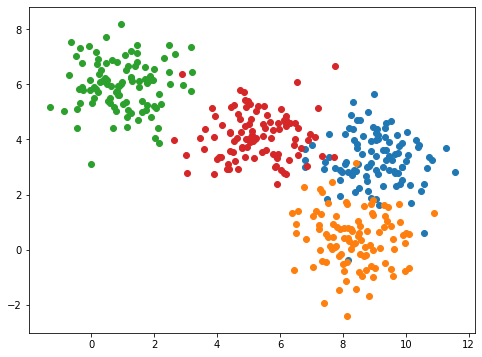

In [98]:
stylized_dt = ap.generate_cluster_data()

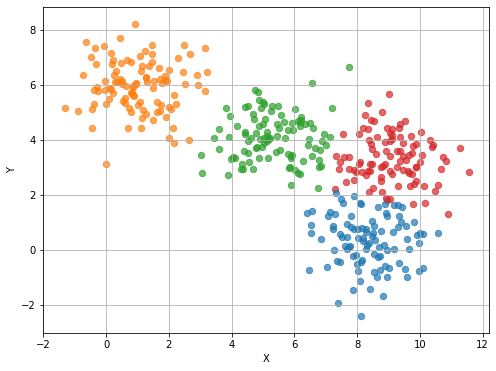

In [100]:
stylized_kmeans_pred = KMeans(n_clusters=4).fit_predict(stylized_dt[["X","Y"]])
stylized_dt["Cluster_pred"] = stylized_kmeans_pred
ap.plot_predicted_clusters(stylized_dt)

##### Real Life  Example

Provide a reasonable segmentation of clients based on transactional behaviour.

In [103]:
# Note that the mean and standard deviation are not the values 
# for the distribution itself, but of the underlying 
# normal distribution it is derived from
n_ind = 1000
n_bus = 50
np.random.seed(1)
transactions_amt_ind = np.random.lognormal(1,2,size=n_ind)
transactions_cnt_ind = np.round(np.random.lognormal(5,1,size=n_ind))
transactions_amt_bus = np.random.lognormal(10,2,size=n_bus)
transactions_cnt_bus = np.round(np.random.lognormal(2,1,size=n_bus))

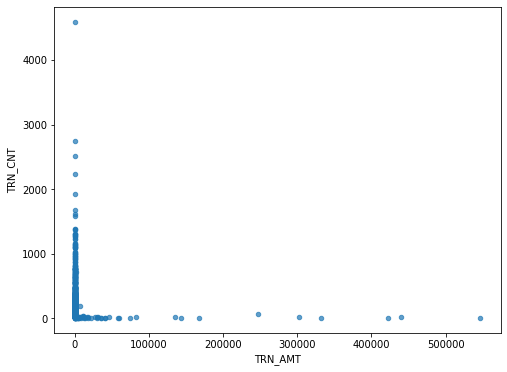

In [105]:
rl_dt = pd.DataFrame({"TRN_AMT":np.concatenate([transactions_amt_ind,
                                                transactions_amt_bus]),
                      "TRN_CNT":np.concatenate([transactions_cnt_ind,
                                                transactions_cnt_bus]),
                      "CLIENT_TYPE": [0]*n_ind + \
                                     [1]*n_bus
                                              })
rl_dt.plot(kind="scatter",x="TRN_AMT",y="TRN_CNT",
           alpha=0.7 ,figsize=[8,6])

Number of observations per cluster:
0    1044
1       6
Name: Cluster_pred, dtype: int64



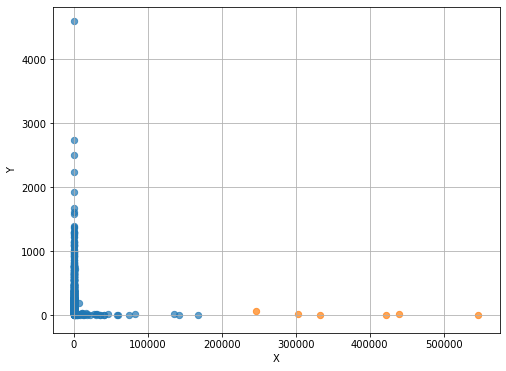

In [106]:
rl_kmeans_pred = KMeans(n_clusters=2).fit_predict(rl_dt[["TRN_AMT",
                                                         "TRN_CNT"]])
rl_dt["Cluster_pred"] = rl_kmeans_pred
rl_dt_toplot = rl_dt.rename({"TRN_AMT":"X",
                             "TRN_CNT":"Y"}, axis =1)

print("Number of observations per cluster:")
print(rl_dt["Cluster_pred"].value_counts())
print("")
ap.plot_predicted_clusters(rl_dt_toplot)
#ap.plot_actual_clusters(rl_dt_toplot)

##### How to deal with real life data

<font color="blue"><b> Solution 1: Standarize the variables

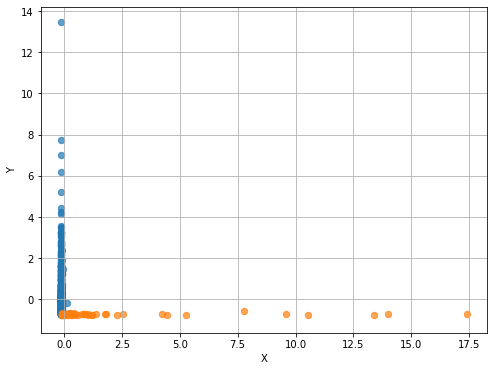

In [107]:
def normalize(x):
    x = np.array(x)
    return (x - x.mean())/x.std(ddof=1)


rl_dt_toplot_std = rl_dt_toplot.copy()
rl_dt_toplot_std["X"] = normalize(rl_dt_toplot["X"])
rl_dt_toplot_std["Y"] = normalize(rl_dt_toplot["Y"])
ap.plot_actual_clusters(rl_dt_toplot_std)

Number of observations per cluster:
0    1044
1       6
Name: Cluster_pred, dtype: int64



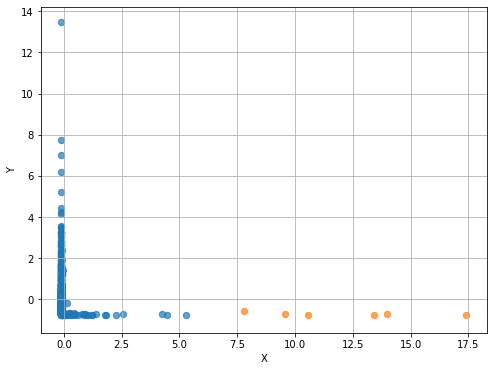

In [108]:
rl_kmeans_std_pred = KMeans(n_clusters=2).fit_predict(rl_dt_toplot_std[["X","Y"]])
rl_dt_toplot_std["Cluster_pred"] = rl_kmeans_std_pred

print("Number of observations per cluster:")
print(rl_dt_toplot_std["Cluster_pred"].value_counts())
print("")
ap.plot_predicted_clusters(rl_dt_toplot_std)

<font color="blue"><b> Solution 2: Take logs

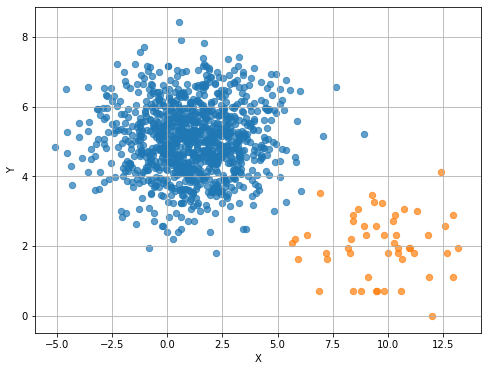

In [110]:
rl_dt_toplot_log = rl_dt_toplot.copy()
rl_dt_toplot_log["X"] = np.log(rl_dt_toplot_log["X"])
rl_dt_toplot_log["Y"] = np.log(rl_dt_toplot_log["Y"])
ap.plot_actual_clusters(rl_dt_toplot_log)

In [32]:
np.log(1100000)-np.log(1000000)

0.09531017980432566

Number of observations per cluster:
0    988
1     62
Name: Cluster_pred, dtype: int64



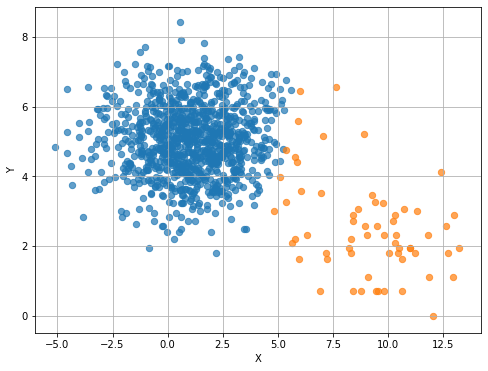

In [33]:
rl_kmeans_log_pred = KMeans(n_clusters=2).fit_predict(rl_dt_toplot_log[["X","Y"]])                                                         
rl_dt_toplot_log["Cluster_pred"] = rl_kmeans_log_pred

print("Number of observations per cluster:")
print(rl_dt_toplot_log["Cluster_pred"].value_counts())
print("")
ap.plot_predicted_clusters(rl_dt_toplot_log)

[Back to K-means](#K-means)

#### Evaluation Methods

<font color="red"><b> TODO FINISH

Contrary to supervised learning where we have the ground truth to evaluate the model’s performance, clustering analysis doesn’t have a solid evaluation metric that we can use to evaluate the outcome of different clustering algorithms. Moreover, since kmeans requires k as an input and doesn’t learn it from data, there is no right answer in terms of the number of clusters that we should have in any problem. Sometimes domain knowledge and intuition may help but usually that is not the case. In the cluster-predict methodology, we can evaluate how well the models are performing based on different K clusters since clusters are used in the downstream modeling.

In this post we’ll cover two metrics that may give us some intuition about k:

* [Elbow method](#Elbow-method)
* [Silhouette analysis](#Silhouette-analysis)

##### Elbow method

Elbow Method
Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. We’ll use the geyser dataset and evaluate SSE for different values of k and see where the curve might form an elbow and flatten out.

In [35]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

NameError: name 'X_std' is not defined

##### Silhouette Analysis

Silhouette analysis can be used to determine the degree of separation between clusters. For each sample:

1. Compute the average distance from all data points in the same cluster (ai).
2. Compute the average distance from all data points in the closest cluster (bi).
3. Compute the coefficient:
$$\dfrac{b^i-a^i}{max(a^i,b^i)}$$

The coefficient can take values in the interval [-1,1]
* If it is 0 –> the sample is very close to the neighboring clusters.
* If it is 1 –> the sample is far away from the neighboring clusters.
* If it is -1 –> the sample is assigned to the wrong clusters.

NameError: name 'X_std' is not defined

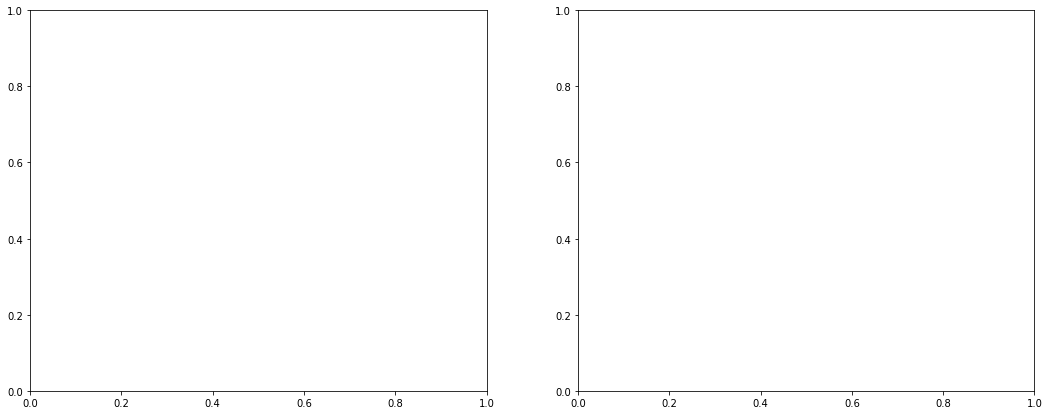

In [36]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

[Back to K-means](#K-means)

### PCA

* [The problem: The Curse of Dimensionality](#The-problem:-The-Curse-of-Dimensionality)
* [The solution: Dimensionality Reduction](#The-solution:-Dimensionality-Reduction)
* [Principal Components](#Principal-Components)
* [PCA in Fixed Income Management](#PCA-in-Fixed-Income-Management)
* [PCA as map reconstructor [Bonus]](#PCA-as-map-reconstructor-[Bonus])

#### The problem: The Curse of Dimensionality

We are so used to living in three dimensions that even a basic 4D hypercube is incredible hard to picture in our mind. 

![ChessUrl](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/8-cell.gif/220px-8-cell.gif "chess")

Many things behave very differently in high-dimensional space. If you pick two points randomly in a unit square, the distance between these two points will be on average, roughly 0.52. If you pick two random points in a unit 3D cube, the average distance will be roughly 0.66. But two points picked randomly in a 1,000,0000 dimensional hypercube wil be 408.25 apart. **High-dimensional datasets are at risk of being sparse**. 

A new instance will likely be far away from any training instance, making predictions less reliable than in lower dimensions and with greater risk of overfitting.

[Back to PCA](#PCA)

#### The solution: Dimensionality Reduction

In most real-world problems, training instances are not spread out uniformily across all dimensions. Many features are amost constant, while others are highly correlated. As a result, all training instances actully lie withing a much lower-dimensional subspace.

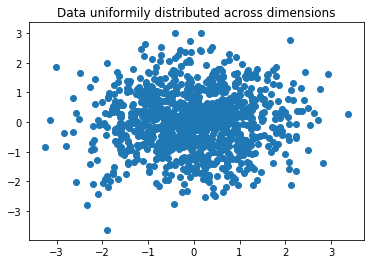

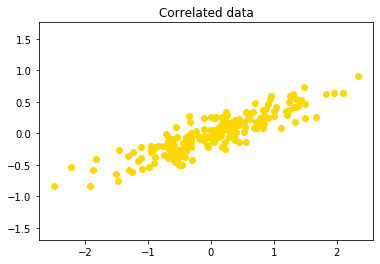

In [57]:
n = 1000
unif_x = np.random.uniform(-100,100,size=n)
unif_y = np.random.uniform(-100,100,size=n)
unif_dt = np.array(list(zip(unif_x,unif_y)))

norm_x = np.random.normal(0,1,size=n)
norm_y = np.random.normal(0,1,size=n)
norm_dt = np.array(list(zip(norm_x,norm_y)))

plt.scatter(norm_x,norm_y,)
plt.title("Data uniformily distributed across dimensions")
plt.show()
plt.title("Correlated data")
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1],color="gold")
plt.axis('equal');

plt.show()

[Back to PCA](#PCA)

#### Principal Components

**Principal components** are a sequence of projections of the data, mutually uncorrelated and ordered in variance. The first principal component has the highest variance among all linear combinations of the features.

Principal components are a useful tool for dimension reduction and copression. 

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

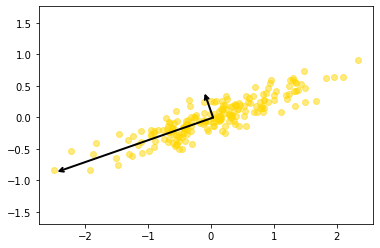

In [59]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, color="gold")
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ap.draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

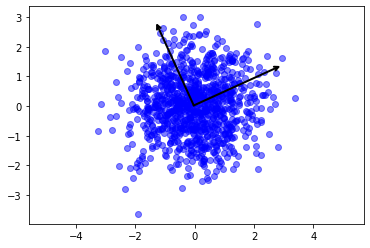

In [60]:
pca = PCA(n_components=2)
pca.fit(norm_dt)
plt.scatter(norm_dt[:, 0], norm_dt[:, 1], alpha=0.5, color="blue")
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ap.draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

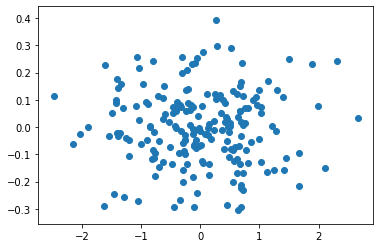

In [61]:
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0],X_pca[:,1])

In [62]:
# The loading vectors
pca_loadings = pd.DataFrame(PCA().fit(correl_dt.T).components_.T,
                            columns=['V1','V2'])
pca_loadings

NameError: name 'correl_dt' is not defined

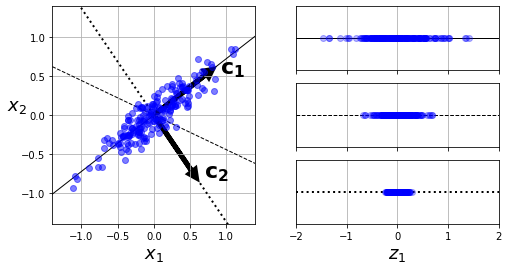

In [63]:
ap.plot_pca_example()

[Back to PCA](#PCA)

#### PCA in Fixed Income Management

In [64]:
pca_data = pd.read_csv("pca_data.csv",sep=";")
pca_data["1yr"].plot()

FileNotFoundError: [Errno 2] File b'pca_data.csv' does not exist: b'pca_data.csv'

In [133]:
ap.plot_yield_curve_evolution(pca_data,days=20)

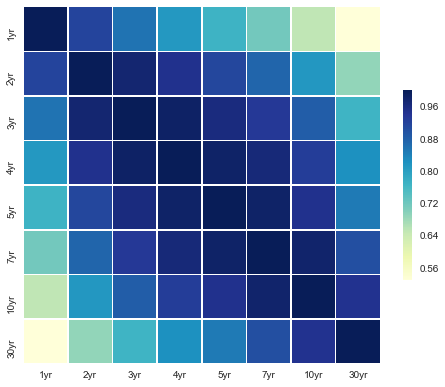

In [134]:
## Plot correlation
corr = pca_data.diff().corr()
ap.plot_cov_heatmap(corr)

We can make use of this correlation through PCA

In [135]:
## Eigendecomposition on the covariance matrix
cov = pca_data.diff().cov()
eig_vals, eig_vecs = np.linalg.eig(cov)

In [144]:
## Factor loadings for Swap Data
pc_cols = ["PC{}".format(i+1) for i in range(eig_vecs.shape[0])]
factor_loadings = pd.DataFrame(eig_vecs, 
                     columns=pc_cols,
                     index = pca_data.columns)
factor_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
1yr,0.215540,-0.500585,0.627480,0.486669,0.121978,-0.237078,0.034151,0.011336
2yr,0.330778,-0.428588,0.129421,-0.353780,-0.212477,0.673888,-0.235982,-0.100144
3yr,0.372106,-0.267036,-0.156955,-0.413752,-0.095822,-0.310957,0.563705,0.413236
4yr,0.391521,-0.109500,-0.255936,-0.174143,-0.018986,-0.551078,-0.511730,-0.415905
5yr,0.404048,0.018544,-0.355374,0.269104,0.594754,0.277983,0.326784,-0.316068
7yr,0.393839,0.193518,-0.194588,0.336079,0.006898,0.099898,-0.421519,0.684780
10yr,0.375578,0.370570,0.067806,0.304746,-0.683616,0.039278,0.279368,-0.277903
30yr,0.304885,0.554358,0.575003,-0.397793,0.330638,-0.022152,-0.031680,0.007014


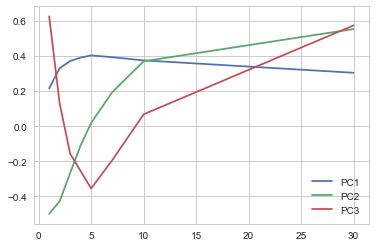

In [147]:
import seaborn as sns
maturities = [int(y[:-2]) for y in  factor_loadings.index]
sns.set_style("whitegrid")
factor_loadings.index = maturities
factor_loadings[["PC1","PC2","PC3"]].plot(title="")

In [145]:
## Standard deviation of factor scores
std_factor_scores = pd.DataFrame(np.sqrt(eig_vals)).T
std_factor_scores.columns = pc_cols
std_factor_scores = std_factor_scores*100
std_factor_scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,17.556876,4.769801,2.077894,1.291778,0.913727,0.732656,0.527974,0.556021


* The first factor (PC1) correspods to a roughly parallel shift in the yield curve. When we have one unit of that factor, the one-year rate increases by 0.216 basis ponts, the two-year rate increases by 0.331 basis ponts, and so on.
* The second factor (PCA2) corresponds to a rotation or change of slope of the yield curve. Rates between 1 year and 4 years move in one direction; rates between 5 years and 30 years move in the other direction.
* The third factor (PCA3) corresponds to a "bowing" of the yield curve. Relatively short(1-year and 2-year) and relatively long(10-year and 30-year) rates move in one direction; the intermediates move in the other direction.

An interest rate move for a particual factor is known as the _factor loading_.

The factors have the property that the factor scores are uncorrleated across the data. The variances of the factor scores have the property that they add up to the total variance of the data.

In [146]:
# Total variance
tot_variance = (std_factor_scores**2).sum(axis=1)[0]
print ("The total variance of the observations is the sum of the variance of each tenor: {}".format(tot_variance))
print("The cumulated variance explained by the factors is:")
(std_factor_scores**2 / tot_variance).cumsum(axis=1)

The total variance of the observations is the sum of the variance of each tenor: 338.9408375217715
The cumulated variance explained by the factors is:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.909433,0.976557,0.989295,0.994218,0.996682,0.998265,0.999088,1.0


<font color="blue"><b>Most of the risk in interest rate moves is accounted for by the first two or three factors.

Now imagine that we own a porfolio with the following exposures to interest rates moves:

In [160]:
exposures = pd.DataFrame({"3-Year Rate" : [10],
                          "4-Year Rate" : [4],
                          "5-Year Rate" : [-8],
                          "7-Year Rate" : [-7],
                          "10-Year Rate": [2],},index = ["Exposure"])
print("Change in Portfolio Value for a 1-Basis-Point Rate Move ($ millions)")
exposures                                                   

Change in Portfolio Value for a 1-Basis-Point Rate Move ($ millions)


,3-Year Rate,4-Year Rate,5-Year Rate,7-Year Rate,10-Year Rate
Exposure,10,4,-8,-7,2


In [176]:
exposures.columns = [3,4,5,7,10] 
pc1_exposure = exposures.T["Exposure"].multiply(factor_loadings["PC1"]).dropna().sum()
pc2_exposure = exposures.T["Exposure"].multiply(factor_loadings["PC2"]).dropna().sum()
print("The Delta exposure to the first factor (with loadings in basis points) is",round(pc1_exposure,2))
print("The Delta exposure to the second factor (with loadings in basis points) is",round(pc2_exposure,2))

The Delta exposure to the first factor (with loadings in basis points) is 0.05
The Delta exposure to the second factor (with loadings in basis points) is -3.87


This approach is similar to using partial durations. The advantage of using a principal components analysis is that it tells you which are the most appropiate shifts to consider. It also provides information on the relative importance of different shifts. In this example, the exposure to the second shift is almost 80 greater than our exposures to the first shift. However, the standard deviation of the first shift is about 3.7 times as great as the standard deviation of the second shift. <font color="blue"><b>A measure of the importance of a factor for a particular portfolio is the product of the delta exposure and the standard deviation of the factor score. Using this measure, the second factor is over 20 times as important as the first factor for the portfolio.

#### PCA as map reconstructor [Bonus]

<font color="red"><b> TODO: Ejemplo de Guille

[Back to PCA](#PCA)

[Back to Clustering](#Clustering)

[Back to Index](#Index)

## KNN

The k-nearest-neighbor procedures do not appear to rely on any stringent assumptions about the underlying data, and can adapt to any situation.However, any particular subregion of the decision boundary depends on a handful of input points and their particular positions, and is thus wiggly and unstable—high variance and low bias.

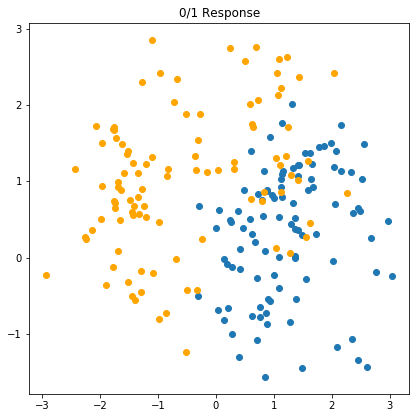

In [65]:
sample_size = 100
data_x, data_y = ap.generate_knn_data(sample_size)
sample_blue = data_x[data_y == 0, :]
sample_orange = data_x[data_y == 1, :]
plot_x_min, plot_x_max,plot_y_min, plot_y_max = ap.plot_sample(sample_blue,
                                                               sample_orange)

### Linear Models

Given a vector of inputs $X^T = (X_1, \cdots, X_p)$, we predict the output $Y$ via the model

\begin{equation}
\hat{Y} = \hat{\beta}_0 + \sum^p_{j=1}X_j\hat{\beta}_j = X^T\hat{\beta},
\end{equation}

where the constant variable 1 in $X^T = (1, X_1, \cdots, X_p)$ and $\hat{\beta}^T = (\beta_0, \beta_1, \cdots, \beta_p)$. The term $\hat\beta_0$ is the intercept, a.k.a. the _bias_ in machine learning.

Here we are modeling a single output, so $\hat{Y}$ is a scalar; in general $\hat{Y}$ can be a $K$-vector, in which case $\beta$ would be a $p \times K$ matrix of coefficients.

In the $(p+1)$-dimensional input-output space, $(X, \hat{Y})$ represents a hyperplane. If the constant is included in $X$, then the hyperplane includes the origin and is a subspace; if not, is is an affine set cutting the $Y$-axis at the point $(0, \hat\beta_0)$. From now on we assume that the intercept is included in $\hat\beta$.

Viewed as a function over the $p$-dimensional input space,

\begin{equation}
f(X) = X^T\beta
\end{equation}

is linear, and the gradient $f'(X) = \beta$ is a vector in input space that points in the steepest uphill direction.

In [66]:
# Linear regression
mat_x = np.hstack((np.ones((sample_size*2, 1)), data_x))
mat_xt = np.transpose(mat_x)
vec_y = data_y

# Solve (X^T*X)b = X^T*y for b
ols_beta = np.linalg.solve(np.matmul(mat_xt, mat_x), np.matmul(mat_xt, vec_y))

print('=== Estimated Coefficients for OLS ===')
print('beta0:', ols_beta[0], '(constant)')
print('beta1:', ols_beta[1])
print('beta2:', ols_beta[2])

=== Estimated Coefficients for OLS ===
beta0: 0.45775772281110155 (constant)
beta1: -0.23530568430162158
beta2: 0.1787954186698939


### Linear model in a classification context

FIGURE 2.1 shows a scatterplot of training data on a pair of inputs $X_1$ and $X_2$.
* The output class variable $G$ has the values $\textsf{BLUE}$ or $\textsf{ORANGE}$.
* There are 100 points in each of the two classes.
* The linear regression model was fit to these data, with the response $Y$ coded as $0$ for $\textsf{BLUE}$ and $1$ for $\textsf{ORANGE}$.

The fitted value $\hat{Y}$ are converted to a fitted class variable $\hat{G}$ according to the rule

\begin{equation}
\hat{G} = \begin{cases}
1 & \text{ (ORANGE) } & \text{ if } \hat{Y} \gt 0.5,\\
0 & \text{ (BLUE) } & \text{ if } \hat{Y} \le 0.5.
\end{cases}
\end{equation}

And the two predicted classes are separated by the *decision boundary* $\{x: x^T\hat{\beta} = 0.5\}$, which in linear.

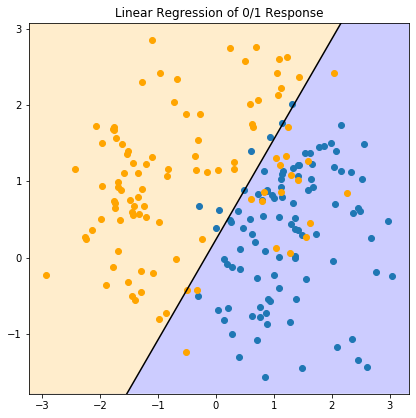

In [67]:
ap.plot_linear_classification(ols_beta,sample_blue,sample_orange,
                              plot_x_min, plot_x_max,plot_y_min, plot_y_max)

### Nearest-Neighbor Methods

Now we look at another classification and regression procedure that is in some sense at the opposite end of the spectrum to the linear model, and far better suited to the second scenario.

> Nearest-neighbor methods use those observations in the training set $\mathcal{T}$ closest in input space to $x$ to form $\hat{Y}$.

The kNN fit for $\hat{Y}$ is defined as follows:

\begin{equation}
\hat{Y}(x) = \frac{1}{k}\sum_{x_i\in N_k(x)} y_i,
\end{equation}

where $N_k(x)$ is the neighborhood of $x$ defined by the $k$ closest points $x_i$ in the training sample. Closeness implies a metric, which for the moment we assume is Euclidean distance.

> So, in other words, we find the $k$ observations with $x_i$ closest to $x$ in input space, and average their responses.

In FIGURE 2.2 we use the same training data, and use 15NN averaging of the binary coded response as the method of fitting. Thus $\hat{Y}$ is the proportion of $\textsf{ORANGE}$s in the neighborhood, and so assigning class $\text{ORANGE}$ to $\hat{G}$ if $\hat{Y} > 0.5$ amounts to a majority vote in the neighborhood.

We see that the decision boundaries that separate the $\textsf{BLUE}$ from the $\textsf{ORANGE}$ regions are far more irregular, and respond to local clusters where one class dominates.

In [68]:
# K-nearest neighbors
def knn(k: int, point, data_x, data_y) -> float:
    if not isinstance(point, np.ndarray):
        point = np.array(point)
    distances = [(sum((x - point)**2), y) for x, y in zip(data_x, data_y)]
    distances.sort()
    return sum(y for _, y in distances[:k])/k

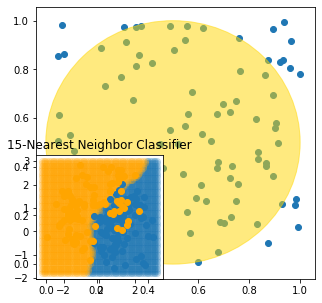

In [69]:
"""FIGURE 2.2. 15-nearest-neighbor method"""
# Compute KNN for k = 15 and k = 1
knn_grid = np.array([(i, j)
                     for i in np.arange(plot_x_min, plot_x_max, .1)
                     for j in np.arange(plot_y_min, plot_y_max, .1)])
knn15_result = np.array([
    (i, j, knn(15, (i, j), data_x, vec_y))
    for i, j in knn_grid
])

# Plot for KNN with k = 15
knn15_blue = np.array([
    (i, j)
    for i, j, knn15 in knn15_result
    if knn15 < .5
])
knn15_orange = np.array([
    (i, j)
    for i, j, knn15 in knn15_result
    if knn15 > .5
])
ax3 = fig.add_subplot(2, 2, 3)
# KNN areas
ax3.plot(knn15_blue[:, 0], knn15_blue[:, 1], 'o', alpha=.2)
ax3.plot(knn15_orange[:, 0], knn15_orange[:, 1], 'o', color='orange', alpha=.2)
# Original data
ax3.plot(sample_blue[:, 0], sample_blue[:, 1], 'o', color='C0')
ax3.plot(sample_orange[:, 0], sample_orange[:, 1], 'o', color='orange')
ax3.set_title('15-Nearest Neighbor Classifier')
fig

Source: https://github.com/dgkim5360/the-elements-of-statistical-learning-notebooks/blob/master/chapter02-overview-of-supervised-learning/section3-least-squares-and-nearest-neighbors.ipynb

Let´s use the popular MNIST dataset to illustrate the usage of this classification technique

In [184]:
from sklearn.neighbors import KNeighborsClassifier

In [191]:
ap = reload(ap)

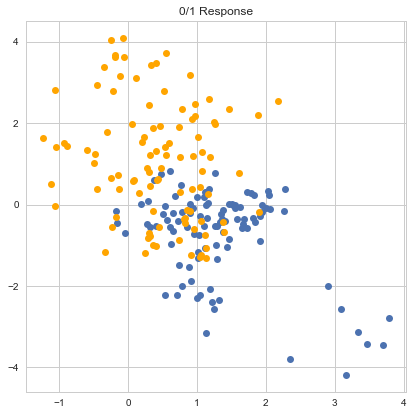

In [198]:
y_train_large = (y)

Both k-nearest neighbours and least squares end up approximating conditional expectations by averages. But they differ dramatically in terms of model assumptions:
* Least squares assumes $f(x)$ is well approximated by a gloally linear function
* $k-nearest$ neighbors assumes $f(x)$ is well approximated by a locally constant function

<font color="red"><b> TODO: Example of Digits Learning

[Back to Index](#Index)

## Markov

<font color="red"><b> Prepare example with PD transition matrix and comment on differences between state-dependent and independent. Implications on whether we can multiply the matrices.

The changes of state of the system are called transitions.A probabilistic automaton includes the probability of a given transition into the transition function, turning it into a transition matrix.

If the Markov chain has N possible states, the matrix will be an N x N matrix, such that entry (I, J) is the probability of transitioning from state I to state J.

 The transition matrix must be a stochastic matrix, a matrix whose entries in each row must add up to exactly 1

•Reducibility: a Markov chain is said to be irreducible if it is possible to get to any state from any state. In other words, a Markov chain is irreducible if there exists a chain of steps between any two states that has positive probability

•Periodicity: a state in a Markov chain is periodic if the chain can return to the state only at multiples of some integer larger than 1. Thus, starting in state 'i', the chain can return to 'i' only at multiples of the period 'k', and k is the largest such integer. State 'i' is aperiodic if k = 1 and periodic if k > 1.

•Transience and Recurrence: A state 'i' is said to be transient if, given that we start in state 'i', there is a non-zero probability that we will never return to 'i'. State i is recurrent (or persistent) if it is not transient. A recurrent state is known as positive recurrent if it is expected to return within a finite number of steps and null recurrent otherwise.

•Ergodicity: a state 'i' is said to be ergodic if it is aperiodic and positive recurrent. If all states in an irreducible Markov chain are ergodic, then the chain is said to be ergodic

•Absorbing State: a state i is called absorbing if it is impossible to leave this state. Therefore, the state 'i' is absorbing if pii = 1 and pij = 0 for i ≠ j. If every state can reach an absorbing state, then the Markov chain is an absorbing Markov chain.

In [204]:
import numpy as np
import random as rm

# The statespace
states = ["Sleep","Icecream","Run"]

# Possible sequences of events
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]

# A function that implements the Markov model to forecast the state/mood.
def activity_forecast(days):
    # Choose the starting state
    activityToday = "Sleep"
    print("Start state: " + activityToday)
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    activityList = [activityToday]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,
                                      p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,
                                      p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,
                                      p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1  
    print("Possible states: " + str(activityList))
    print("End state after "+ str(days) + " days: " + activityToday)
    print("Probability of the possible sequence of states: " + str(prob))

# Function that forecasts the possible state for the next 2 days
activity_forecast(2)



Start state: Sleep
Possible states: ['Sleep', 'Run', 'Icecream']
End state after 2 days: Icecream
Probability of the possible sequence of states: 0.18


In [205]:
def activity_forecast(days):
    # Choose the starting state
    activityToday = "Sleep"
    activityList = [activityToday]
    i = 0
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1    
    return activityList

# To save every activityList
list_activity = []
count = 0

# `Range` starts from the first count up until but excluding the last count
for iterations in range(1,10000):
        list_activity.append(activity_forecast(2))

# Check out all the `activityList` we collected    
#print(list_activity)

# Iterate through the list to get a count of all activities ending in state:'Run'
for smaller_list in list_activity:
    if(smaller_list[2] == "Run"):
        count += 1

# Calculate the probability of starting from state:'Sleep' and ending at state:'Run'
percentage = (count/10000) * 100
print("The probability of starting at state:'Sleep' and ending at state:'Run'= " + str(percentage) + "%")


The probability of starting at state:'Sleep' and ending at state:'Run'= 62.370000000000005%


In [206]:
The probability of starting at state:'Sleep' and ending at state:'Run'= 62.419999999999995%

SyntaxError: invalid syntax (<ipython-input-206-2ea2700108c1>, line 1)

https://www.datacamp.com/community/tutorials/markov-chains-python-tutorial

https://medium.com/@__amol__/markov-chains-with-python-1109663f3678

<font color="red"><b> TODO: Example of transition matrices based on my thesis

[Back to Index](#Index)

## Monte Carlo Simulation

* [Approximate Pi](#Approximate-Pi)
* [Pricing with Monte Carlo Simulation](#Pricing-with-Monte-Carlo-Simulation)

### Approximate Pi

The area of the circle is $πr2=π/4$, the area of the square is 1. If we divide the area of the circle, by the area of the square we get $π/4$. If we divide the number of points within the circle, $N_{inner}$ by the total number of points, $N_{total}$, we should get a value that is an approximation of the ratio of the areas we calculated above, π/4

$$ \pi \approx 4 \cdot \dfrac{N_{inner}}{N_{total}} $$

In [70]:
np.pi

3.141592653589793

Ratio of areas: 0.77
Estimated Pi: 3.08
Estimated error: -1.96 %


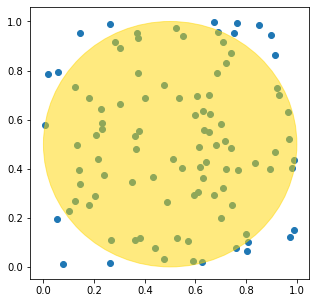

In [71]:
n = 100
x_dart = np.random.uniform(0,1,size=n)
y_dart = np.random.uniform(0,1,size=n)

fig, ax = plt.subplots(figsize=[5,5])
plt.scatter(x_dart,y_dart)
circle = plt.Circle((0.5, 0.5), 0.5, color='gold',alpha=0.5)
ax.add_artist(circle)

ratio_of_areas = np.sum([np.sqrt(x**2+y**2)<1 for x,y 
                         in zip(x_dart,y_dart)]) / n

est_pi = 4*ratio_of_areas
print("Ratio of areas:",ratio_of_areas)
print("Estimated Pi:",est_pi)
print("Estimated error:",(round((est_pi-np.pi)/np.pi *100,2)),"%")

[Back to Monte Carlo Simulation](#Monte-Carlo-Simulation)

### Pricing with Monte Carlo Simulation

[Place holder function for market stochastic process]    
[Place holder Payoffs]

In [72]:
def simulate_paths(M = 50,sigma = 0.2,T = 1.0,I = 1000):
    '''
    Inputs:
        - M: Time steps
        - sigma: Volatility
        - T: Time step legth
        - I: Number of iterations
    
    '''
    np.random.seed(20000)
    dt = T

    # Simulating I paths with M time steps
    ran = np.random.standard_normal((M + 1, I))
    ran -= ran.mean()  # corrects 1st moment
    ran /= ran.std()  # corrects 2nd moment
    S = np.zeros_like(ran)
    S[0] = S0
    S[1:] = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt
                + sigma * np.sqrt(dt) * ran[1:], axis=0))
    return S
          # vectorized operation per time step over all paths

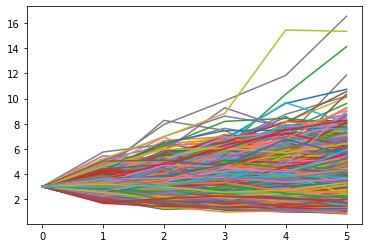

In [75]:
S0 = 3
r = 0.05
S = simulate_paths(M = 5,sigma = 0.2,T = 1.0,I = 1000)
plt.plot(S[:100])
plt.show()

In [225]:
S.mean()

113.34646039848138

In [226]:
def european_call_option(S, S0 = 100,K = 105,T = 1.0, r = 0.05,I=1000):
    C0 = math.exp(-r * T) * np.sum(np.maximum(S[-1] - K, 0)) / I
    return C0

In [227]:
european_call_option(S, S0 = 100,K = 105,T = 1.0, r = 0.05,I=1000)

32.16288522599338

<font color="red"><b> TODO: Visualization and example of joining distributions (MANTAS)

[Back to Index](#Index)